In [144]:
import pandas as pd
import numpy as np

%matplotlib inline

data = pd.read_csv('../assets/data/indeed_data.csv')

import seaborn as sb

data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)


## Exploratory Analysis

In [145]:
data.head()

,week,distinct(jobid),total_search,median_salary,inflation
time,,,,,
2013-01-01,1,3299703,18113003,83000.0,1.7
2013-01-08,2,3397197,19019956,75000.0,1.7
2013-01-15,3,3352407,18775864,70500.0,1.7
2013-01-22,4,3397329,19767719,69000.0,1.7
2013-01-29,5,3469923,19080634,72500.0,2.0


In [146]:
data.describe()

,week,distinct(jobid),total_search,median_salary,inflation
count,176.000000,1.760000e+02,1.760000e+02,176.000000,176.000000
mean,88.500000,4.476640e+06,5.018155e+07,69780.988636,1.055682
std,50.950957,8.412307e+05,2.394111e+07,7213.127512,0.704331
min,1.000000,3.236651e+06,1.811300e+07,50000.000000,-0.200000
25%,44.750000,3.725054e+06,2.543200e+07,65000.000000,0.350000
50%,88.500000,4.277720e+06,6.014817e+07,69551.500000,1.100000
75%,132.250000,5.238897e+06,7.414739e+07,75000.000000,1.600000
max,176.000000,6.307929e+06,8.270804e+07,92500.000000,2.100000


In [147]:
data = data.rename(columns={'distinct(jobid)': 'jobs'})


In [148]:
data.head()

,week,jobs,total_search,median_salary,inflation
time,,,,,
2013-01-01,1,3299703,18113003,83000.0,1.7
2013-01-08,2,3397197,19019956,75000.0,1.7
2013-01-15,3,3352407,18775864,70500.0,1.7
2013-01-22,4,3397329,19767719,69000.0,1.7
2013-01-29,5,3469923,19080634,72500.0,2.0


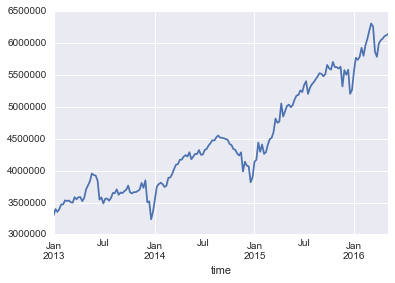

In [149]:
data.jobs.plot()

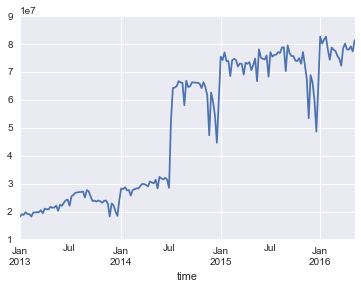

In [150]:
data.total_search.plot()

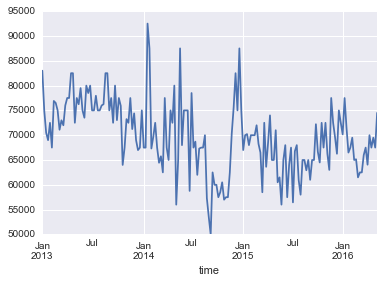

In [151]:
data.median_salary.plot()

In [153]:
data['ratio']= data.total_search / data.jobs

In [154]:
data.head()

,week,jobs,total_search,median_salary,inflation,ratio
time,,,,,,
2013-01-01,1,3299703,18113003,83000.0,1.7,5.489283
2013-01-08,2,3397197,19019956,75000.0,1.7,5.598720
2013-01-15,3,3352407,18775864,70500.0,1.7,5.600711
2013-01-22,4,3397329,19767719,69000.0,1.7,5.818606
2013-01-29,5,3469923,19080634,72500.0,2.0,5.498864


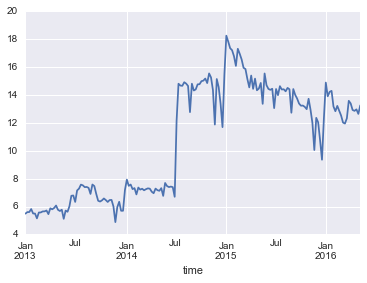

In [155]:
data.ratio.plot()

In [156]:
data = data.drop(data.index[:79])

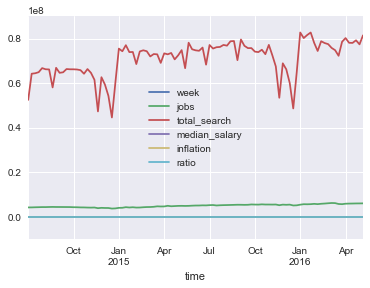

In [157]:
data.plot()

In [158]:
data[['median_salary']].resample('W').mean().sort_values('median_salary')

,median_salary
time,
2014-09-14,50000.0
2014-09-07,53500.0
2015-05-31,56000.0
2015-07-12,56460.0
2014-11-02,57000.0
2014-08-31,57300.0
2014-11-16,57500.0
2014-11-09,57500.0
2015-06-21,57500.0


In [165]:
average_salary_byweek = data[['median_salary']].resample('W').mean()
average_ratio_inflation_byweek = data[['ratio', 'inflation']].resample('W').mean()

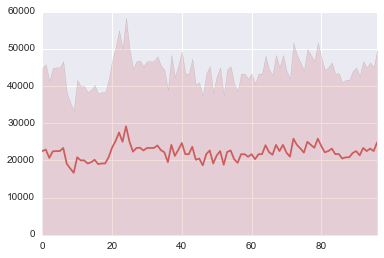

In [173]:
sb.tsplot([data.median_salary, data.inflation, data.ratio], color="indianred")

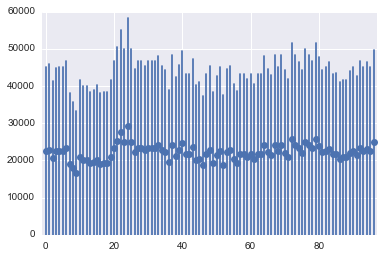

In [160]:
sb.tsplot([data.median_salary, data.inflation, data.ratio], err_style="ci_bars", interpolate=False)

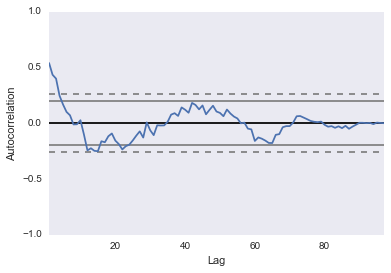

In [112]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(data.median_salary)

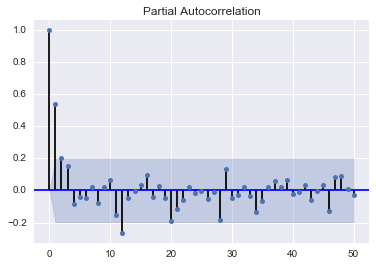

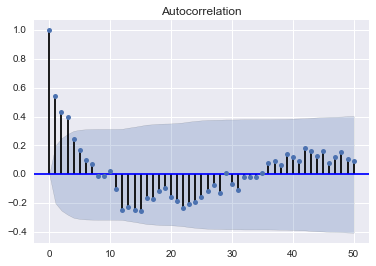

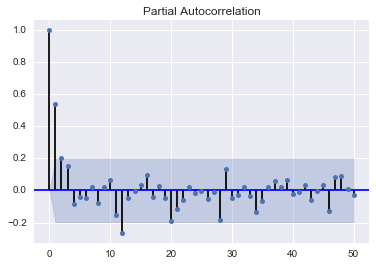

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.median_salary, lags=50)
plot_pacf(data.median_salary, lags=50)

In [174]:
#average_daily_sales['Sales'].autocorr(lag=1)
average_salary_byweek['median_salary'].autocorr(lag=1)

0.5440137480509355